<a href="https://colab.research.google.com/github/dominiksakic/deeplearning00/blob/main/binaryClassificationMovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from tensorflow.keras.datasets import imdb
# Keep the 10.000 most common words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [19]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])

decode_review = " ".join(
    reverse_word_index.get(i-3, "?") for i in train_data[0])

print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [20]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6801 - loss: 0.6210 - val_accuracy: 0.8628 - val_loss: 0.4097
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8887 - loss: 0.3577 - val_accuracy: 0.8834 - val_loss: 0.3188
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9184 - loss: 0.2606 - val_accuracy: 0.8906 - val_loss: 0.2864
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9343 - loss: 0.2039 - val_accuracy: 0.8917 - val_loss: 0.2740
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9498 - loss: 0.1654 - val_accuracy: 0.8859 - val_loss: 0.2897
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9567 - loss: 0.1433 - val_accuracy: 0.8852 - val_loss: 0.2865
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9658 - loss: 0.1219 - val_accuracy: 0.8846 - val_loss: 0.2934
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9702 - loss: 0.1027 - val_accuracy: 0.8804 - v

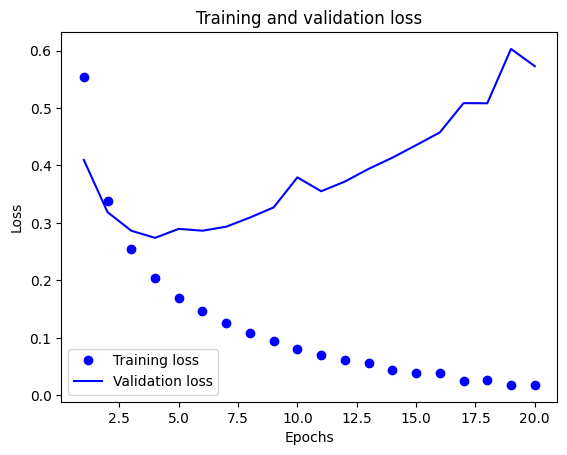

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

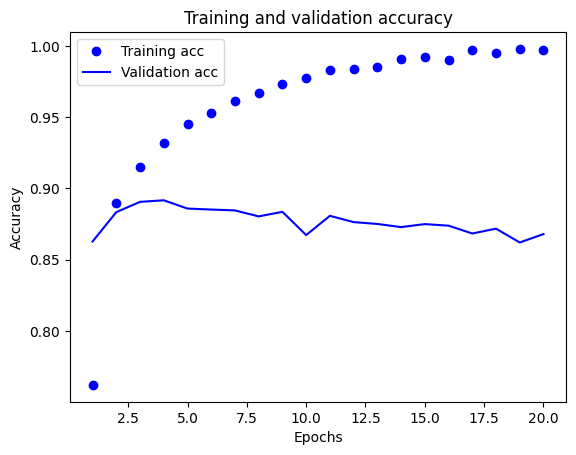

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8539 - loss: 0.6320


In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6905 - loss: 0.6009 - val_accuracy: 0.8667 - val_loss: 0.3968
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8982 - loss: 0.3385 - val_accuracy: 0.8821 - val_loss: 0.3184
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9196 - loss: 0.2507 - val_accuracy: 0.8801 - val_loss: 0.2975
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9356 - loss: 0.1972 - val_accuracy: 0.8872 - val_loss: 0.2793


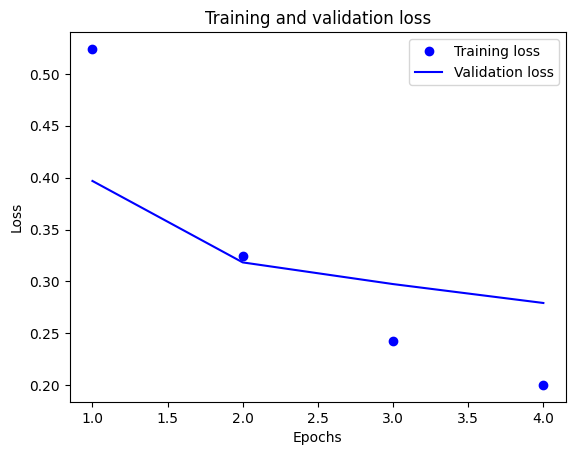

In [29]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

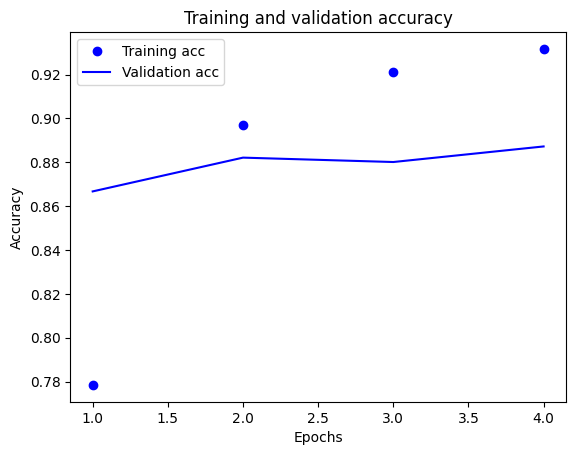

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8793 - loss: 0.2939


In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7020 - loss: 0.5879 - val_accuracy: 0.8672 - val_loss: 0.4034
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8926 - loss: 0.3543 - val_accuracy: 0.8807 - val_loss: 0.3333
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9166 - loss: 0.2706 - val_accuracy: 0.8861 - val_loss: 0.3004
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9276 - loss: 0.2304 - val_accuracy: 0.8883 - val_loss: 0.2869
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8811 - loss: 0.2990


## One Dense Layer Obesrvation

Accurany and loss improved minimal.

In [39]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6117 - loss: 0.6500 - val_accuracy: 0.8626 - val_loss: 0.4657
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8627 - loss: 0.4133 - val_accuracy: 0.8693 - val_loss: 0.3538
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9188 - loss: 0.2501 - val_accuracy: 0.8886 - val_loss: 0.2868
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9379 - loss: 0.1829 - val_accuracy: 0.8789 - val_loss: 0.3297
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8701 - loss: 0.3517


## Observation more layers

Each added Layer decreases the the accurancy and loss for our Problem.

In [47]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7043 - loss: 0.6032 - val_accuracy: 0.8595 - val_loss: 0.4140
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8891 - loss: 0.3544 - val_accuracy: 0.8741 - val_loss: 0.3281
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9149 - loss: 0.2594 - val_accuracy: 0.8875 - val_loss: 0.2880
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9352 - loss: 0.2007 - val_accuracy: 0.8871 - val_loss: 0.2827
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8787 - loss: 0.2961


## Oberservation Increaing layers with more units


### 3 Dense Layers

1.   16: accuracy: 0.8793 - loss: 0.2939
2.   32: accuracy: 0.8691 - loss: 0.3158
3.   64: accuracy: 0.8828 - loss: 0.2916



In [48]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"]
)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6500 - loss: 0.2188 - val_accuracy: 0.8303 - val_loss: 0.1537
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8712 - loss: 0.1232 - val_accuracy: 0.8789 - val_loss: 0.1040
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9093 - loss: 0.0842 - val_accuracy: 0.8812 - val_loss: 0.0939
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9313 - loss: 0.0644 - val_accuracy: 0.8835 - val_loss: 0.0874
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8774 - loss: 0.0920


In [49]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.6994 - loss: 0.5794 - val_accuracy: 0.8654 - val_loss: 0.3730
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8943 - loss: 0.3126 - val_accuracy: 0.8622 - val_loss: 0.3340
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9249 - loss: 0.2180 - val_accuracy: 0.8848 - val_loss: 0.2768
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9445 - loss: 0.1648 - val_accuracy: 0.8847 - val_loss: 0.2770
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8769 - loss: 0.2974
